# Video Game Sales Analysis

The purpose of this notebook is to answer these 3 questions:
1.   [Which platform has the highest game sale?](#question1)
2.   [Which column affect ``Global_Sales`` the most?](#question2)
3.   [Which year has the highest amount of game sales?](#question3)


    Does a platform affect game sales
    Which year sale the most games?
    Is there a corelation between game genre and game sales


# Setup

For this section, I will be importing the required libraries and the dataset

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fast')


# read the data
data = pd.read_csv('drive/MyDrive/Grad/DataScienceFoundation/FinalProject/data/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [157]:
data.shape

(16598, 11)

In [158]:
[(col, data[col].nunique(), data[col].dtype) for col in data.columns]

[('Rank', 16598, dtype('int64')),
 ('Name', 11493, dtype('O')),
 ('Platform', 31, dtype('O')),
 ('Year', 39, dtype('float64')),
 ('Genre', 12, dtype('O')),
 ('Publisher', 578, dtype('O')),
 ('NA_Sales', 409, dtype('float64')),
 ('EU_Sales', 305, dtype('float64')),
 ('JP_Sales', 244, dtype('float64')),
 ('Other_Sales', 157, dtype('float64')),
 ('Global_Sales', 623, dtype('float64'))]

In [159]:
# Name and Rank contains very high amount of unique values. Rest of them seems fine.
data['Name'].nunique()/data.shape[0]*100

69.24328232317146

In [160]:
# We might have to drop rank since it does not server much purpose
data['Rank'].nunique()/data.shape[0]*100

100.0

In [161]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Looking at the counts, we can see that all columns except for `Year` have some minor data lost. Looking at the mean and median, we can find out about the skewness of the data. For NA, EU, JP, Other, and Global Sales, we can see that `mean` is **greater** than `median` which indicate that the data is rights skewed.

# Exploratory data analysis (EDA)

In [162]:
numerical_var = [col for col in data.columns if data[col].dtype != object]
categorical_var = [col for col in data.columns if data[col].dtype == object]
print(numerical_var)
print(categorical_var)

['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
['Name', 'Platform', 'Genre', 'Publisher']


<a name="numericalEDA"></a>

## Numerical Variable EDA

### Rank

<Axes: xlabel='Rank', ylabel='Count'>

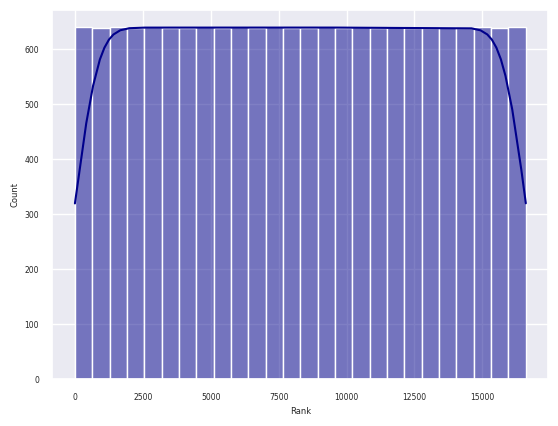

In [163]:
sns.histplot(x=data['Rank'], color='darkblue', kde=True)

### Year

<Axes: xlabel='Year', ylabel='Count'>

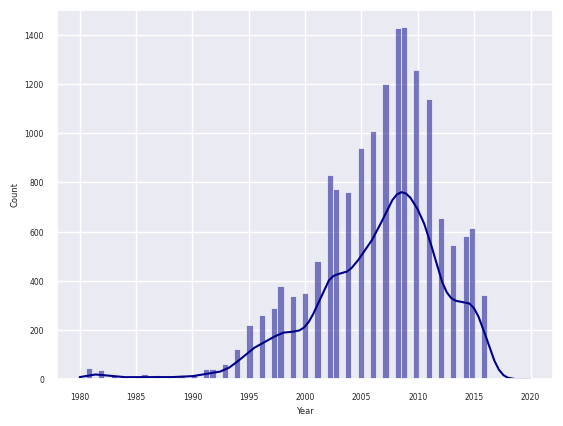

In [164]:
sns.histplot(x=data['Year'], color='darkblue', kde=True)

### NA_Sales

<Axes: xlabel='NA_Sales', ylabel='Count'>

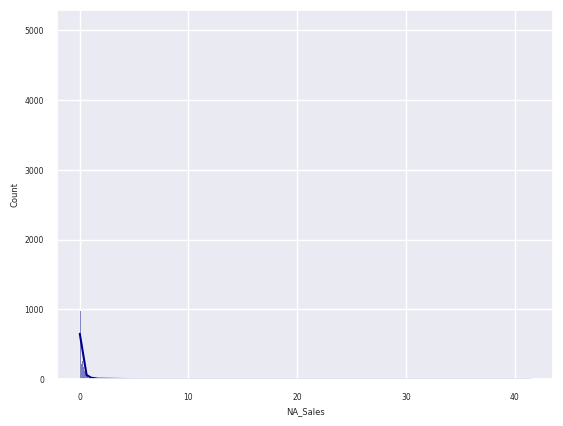

In [165]:
sns.histplot(x=data['NA_Sales'], color='darkblue', kde=True)

### EU_Sales

<Axes: xlabel='EU_Sales', ylabel='Count'>

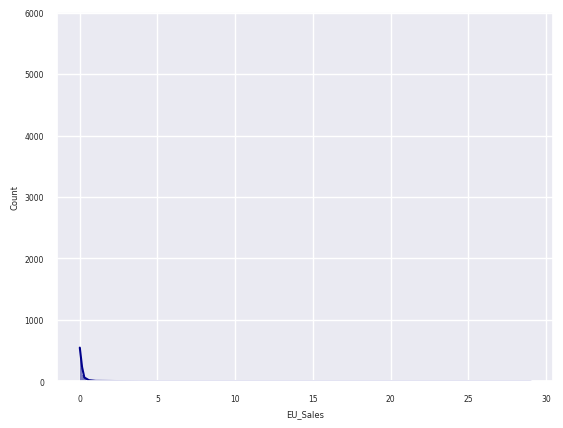

In [166]:
sns.histplot(x=data['EU_Sales'], color='darkblue', kde=True)

### JP_Sales

<Axes: xlabel='JP_Sales', ylabel='Count'>

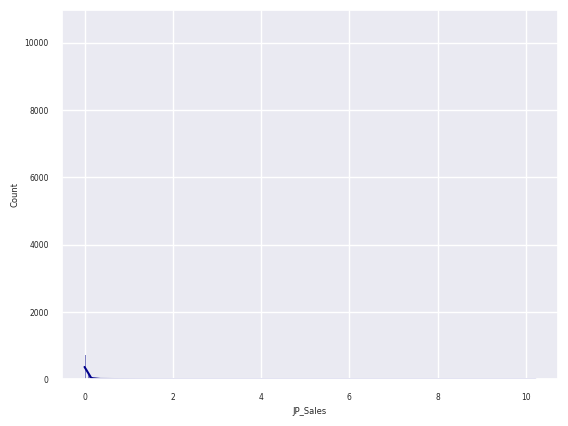

In [167]:
sns.histplot(x=data['JP_Sales'], color='darkblue', kde=True)

### Other_Sales

<Axes: xlabel='Other_Sales', ylabel='Count'>

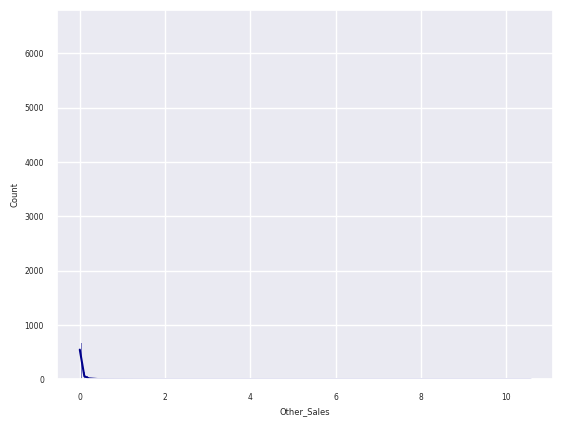

In [168]:
sns.histplot(x=data['Other_Sales'], color='darkblue', kde=True)

### Global_Sales

<Axes: xlabel='Global_Sales', ylabel='Count'>

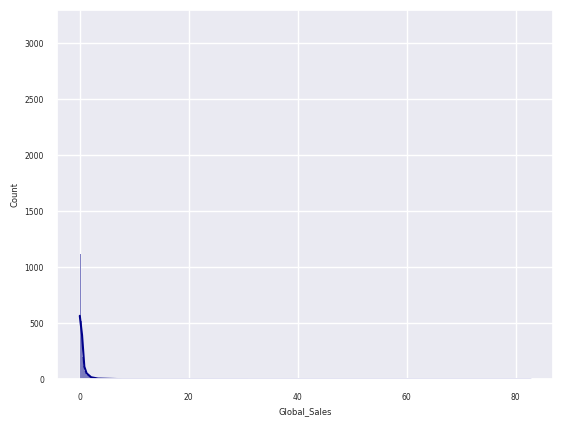

In [169]:
sns.histplot(x=data['Global_Sales'], color='darkblue', kde=True)

Earlier, when I did the `data.describe()`, I hypothesize that the 5 sales columns (NA, EU, JP, Other, and Global) are right skewed, the graph validate my hypothesis.

<a name="categoricalEDA"></a>
## Categorical Variable EDA

For this section, I will be using a barplot and a count plot. Barplot will calculate the means of the values in a column. Countplot will show the number of observation of a category in a column

In [170]:
categorical_var

['Name', 'Platform', 'Genre', 'Publisher']

### Name

<Axes: xlabel='Name', ylabel='Count'>

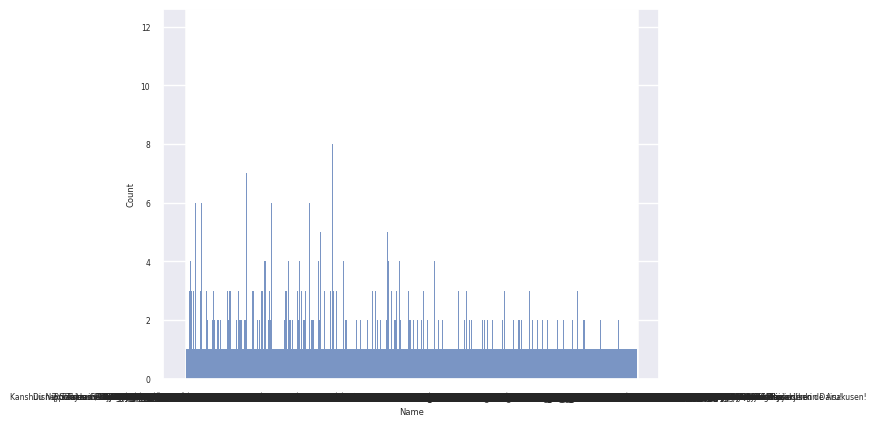

In [171]:
sns.histplot(x=data['Name'])

<a name="platform"></a>
### Platform

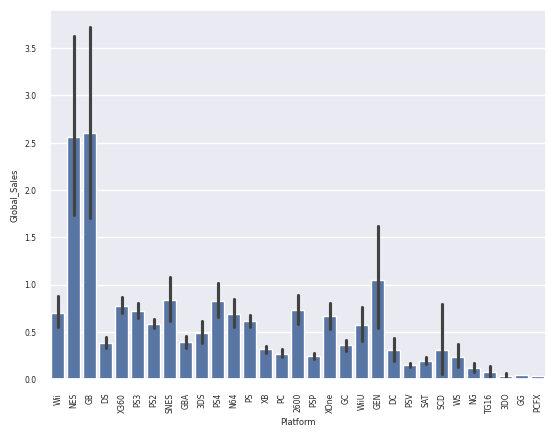

In [172]:
sns.barplot(x='Platform', y='Global_Sales', data=data)
plt.xticks(rotation=90);

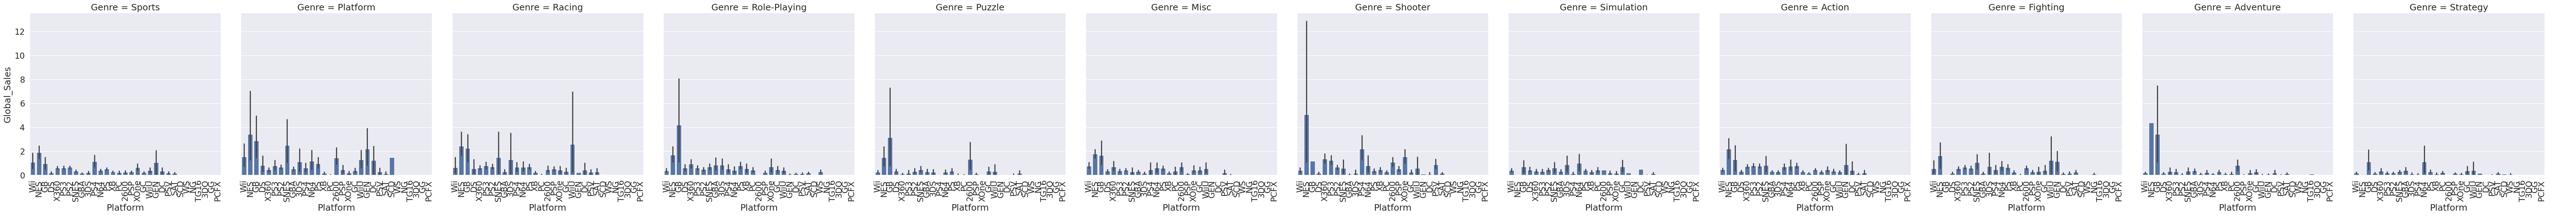

In [173]:
sns.set(style = 'darkgrid',font_scale = 1.5)
g = sns.catplot(x = 'Platform', y = 'Global_Sales', data = data, kind = 'bar', col = 'Genre', height=6, aspect=1)
g.set_xticklabels(rotation=90)

<a name="genre"></a>

### Genre

In [174]:
len(data['Platform'].unique())

31

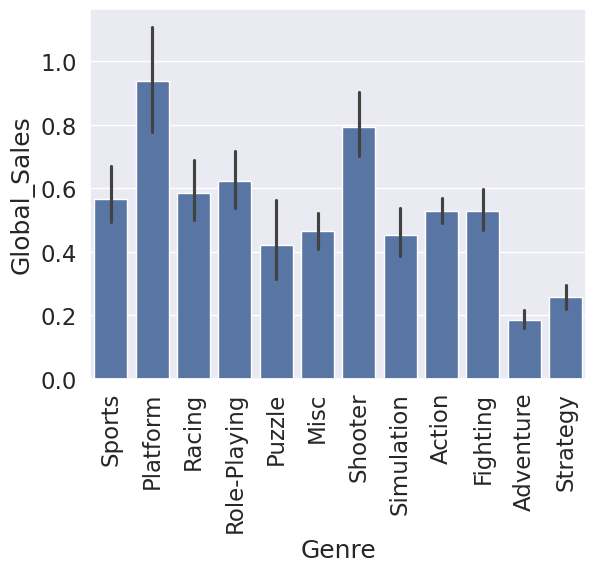

In [175]:
sns.barplot(x='Genre', y='Global_Sales', data=data)
plt.xticks(rotation=90);

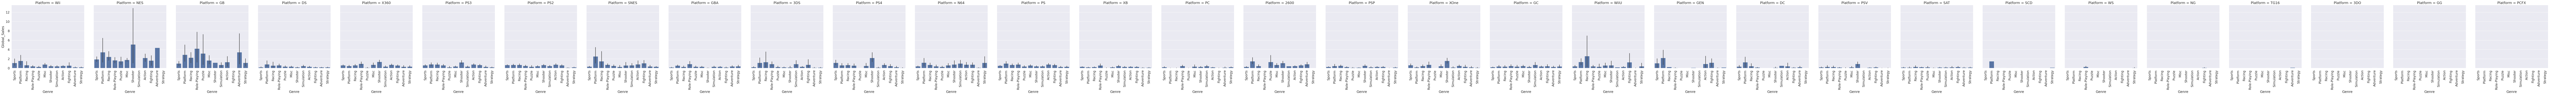

In [176]:
sns.set(style = 'darkgrid',font_scale = 1.5)
g = sns.catplot(x = 'Genre', y = 'Global_Sales', data = data, kind = 'bar', col = 'Platform', height=6, aspect=1)
g.set_xticklabels(rotation=90)

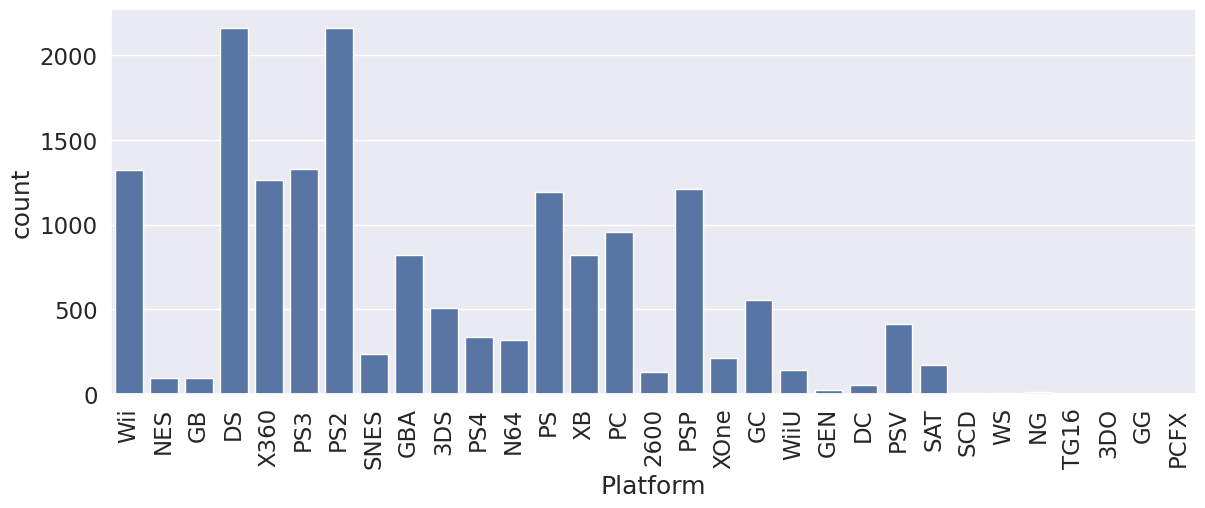

In [177]:
plt.figure(figsize = (14,5))

sns.countplot(x = 'Platform', data = data);
plt.xticks(rotation = 90);

### Publisher

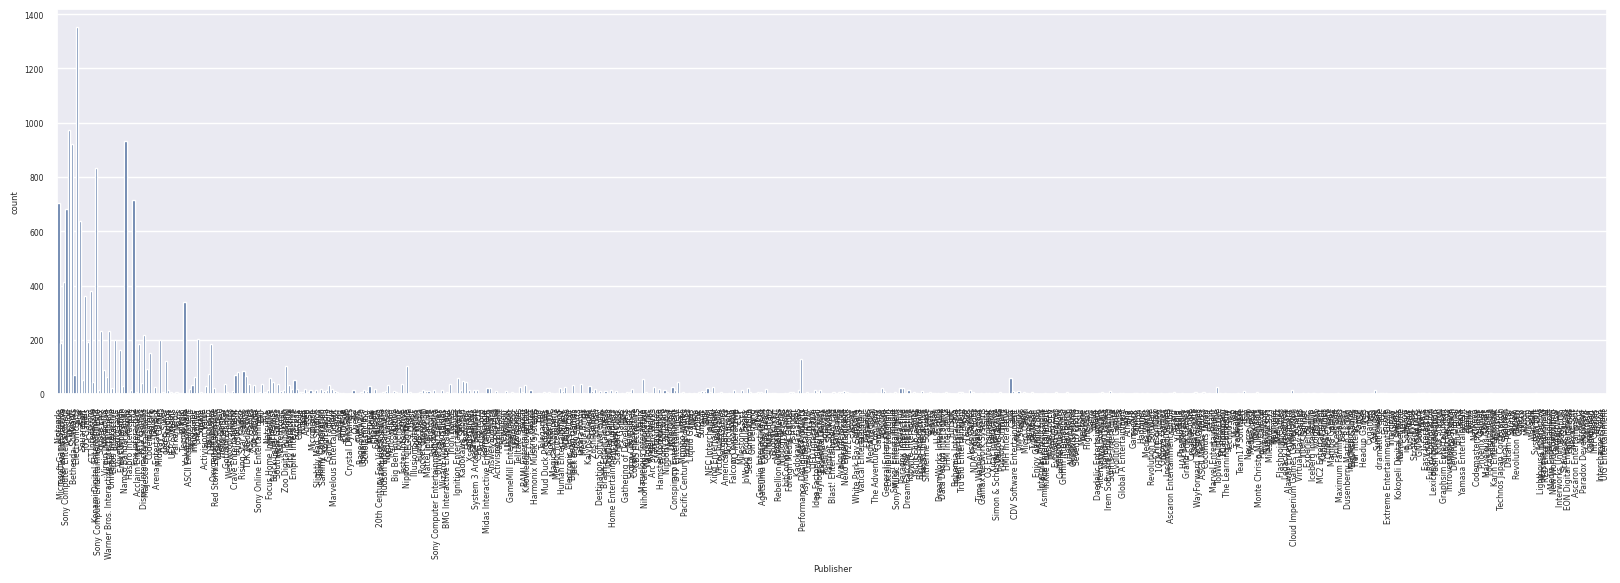

In [178]:
plt.figure(figsize = (20,5))
sns.set(style = 'darkgrid',font_scale = .5)

sns.countplot(x='Publisher', data=data)
plt.xticks(rotation=90);

# Feature engineering

For this section, I will be doing a few things to cleanup the data
*    Convert all columns to the best data type that owuld fit them

In [ ]:
print(data.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


## Handling NaN

In [ ]:
#Percentage of row with nan in every column.
for col in data.columns:
    print((col, len(data[data[col].isna()])/len(data[col])*100))

('Rank', 0.0)
('Name', 0.0)
('Platform', 0.0)
('Year', 1.6327268345583803)
('Genre', 0.0)
('Publisher', 0.3494396915290999)
('NA_Sales', 0.0)
('EU_Sales', 0.0)
('JP_Sales', 0.0)
('Other_Sales', 0.0)
('Global_Sales', 0.0)


In [ ]:
col_with_nan = ['Publisher','Year']

In [ ]:
# Imputing nan with mode
for col in col_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
data[col_with_nan].describe()

,Year
count,16598.000000
mean,2006.448789
std,5.790533
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


## Handling Skewness

In [ ]:
numerical_var

['Rank',
 'Year',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [ ]:
data['NA_Sales'] = np.log1p(data['NA_Sales'])
data['EU_Sales'] = np.log1p(data['EU_Sales'])
data['JP_Sales'] = np.log1p(data['JP_Sales'])
data['Other_Sales'] = np.log1p(data['Other_Sales'])
data['Global_Sales'] = np.log1p(data['Global_Sales'])

In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.448789,0.175295,0.103713,0.056887,0.040008,0.306510
std,4791.853933,5.790533,0.281578,0.213197,0.160061,0.101215,0.396029
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.009950
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.058269
50%,8300.500000,2007.000000,0.076961,0.019803,0.000000,0.009950,0.157004
75%,12449.750000,2010.000000,0.215111,0.104360,0.039221,0.039221,0.385262
max,16600.000000,2020.000000,3.749269,3.401864,2.417698,2.448416,4.427717


In [ ]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,3.749269,3.401864,1.562346,2.247072,4.427717
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,3.403860,1.521699,2.055405,0.570980,3.719409
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,2.824351,2.630449,1.566530,1.460938,3.606041
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,2.818398,2.485740,1.453953,1.376244,3.526361
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,2.507157,2.291524,2.417698,0.693147,3.477232
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.009950,0.000000,0.000000,0.000000,0.009950
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.009950,0.000000,0.000000,0.000000,0.009950
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.000000,0.000000,0.000000,0.000000,0.009950
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.000000,0.009950,0.000000,0.000000,0.009950


## Removing Rank

In [145]:
data = data.drop(['Rank'], axis=1)

In [146]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


<a name="correlation"></a>
## Correlation

In [179]:
temp = data.apply(lambda x : pd.factorize(x)[0])

<Axes: >

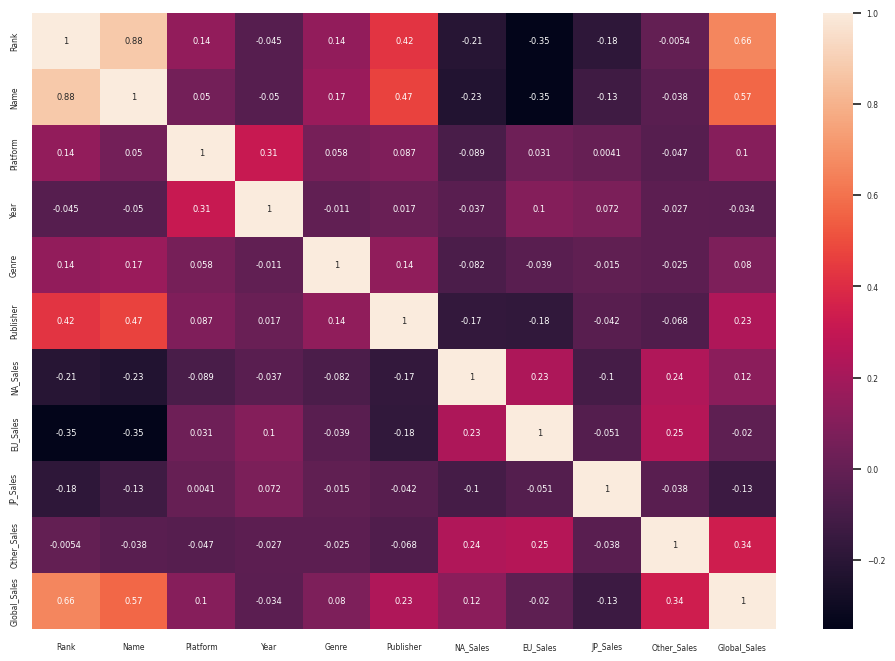

In [183]:
plt.figure(figsize = (12, 8))

sns.heatmap(temp.corr(), annot = True)

---
<a name="question1"></a>

# Question 1: Does a platform affect game sales?

Taking a look at the correlation heatmap created [here](#correlation), we can see that there is only 0.1, meaning that as we change platforms, there is a slight increase in game sales globally.

To visualize this, please take a look at the `Platform` [graph](#platform) in the [Categorical Variable EDA](#categoricalEDA) section. We can see that some platforms have higher sales than the other, with the gameboy (GB) having the highest sales.


---
<a name="question2"></a>

# Question 2: Is there a corelation between game genre and game sales?

Looking at the [correlation heatmap](#correlation), there is only a 0.08 correlation between game sales and genre. This indicate that as we change between genres, there is a slight increase in game sales globally.

This change can be observer when we check the Genre by Global Sales graph [here](#genre), we can see that there are slight increases between different game genres.



---
<a name="question3"></a>

# Question 3: Which year has the highest amount of game sales?

For this question, I will be taking at the year the games were release and see which year has the highest number of sales.

To do this I will aggregate all the games that was sold in a year and then compare which year had the highest number of sales


In [ ]:
data.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.0
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.7,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.9,0.0,0.69,7.37


In [ ]:
sum_df = data.groupby('Year').Global_Sales.sum().to_frame().reset_index()
sum_df

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


In [ ]:
sum_df[sum_df.index ==sum_df.Global_Sales.idxmax()]

,Year,Global_Sales
28,2008,678.9


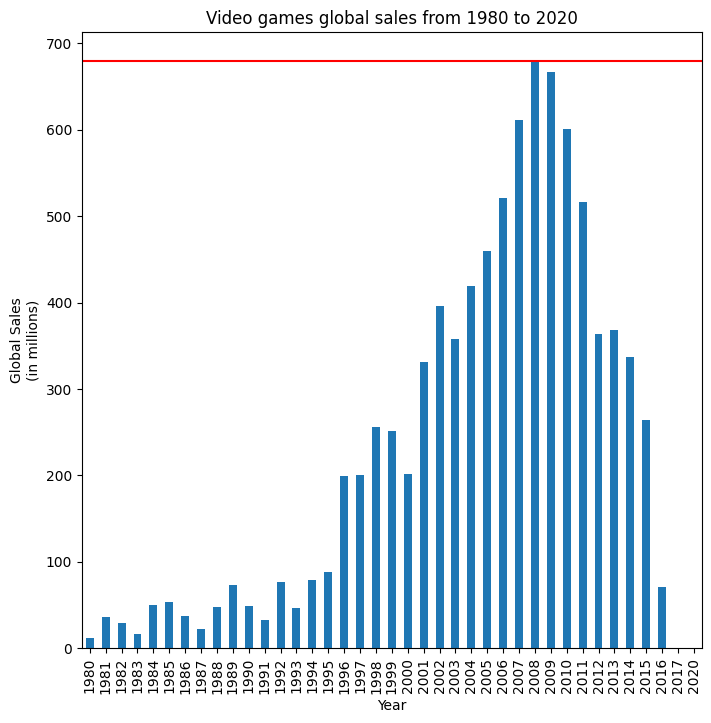

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sum_df.sort_values(by='Year').plot(
    x='Year',
    y='Global_Sales',
    kind='bar',
    title='Video games global sales from 1980 to 2020',
    ylabel='Global Sales\n(in millions)',
    legend=False,
    rot=90,
    ax = ax)

plt.axhline(y=679, color='red')


### Results

Taking a look at the graph above, we can see that 2008 has the highest number of sales, showint that 2008 was the best year for Video Game sales.